In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sys.path.append("../")

from mlalgorithms.linear_models import LinearRegression, Ridge, Lasso

In [2]:
X, y = load_boston(return_X_y=True)
print("Dimensions of X: {} and y: {}".format(X.shape, y.shape))

Dimensions of X: (506, 13) and y: (506,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Dimensions of X_train: {} and y_train: {}".format(X_train.shape, y_train.shape))
print("Dimensions of X_test: {} and y_test: {}".format(X_test.shape, y_test.shape))

Dimensions of X_train: (354, 13) and y_train: (354,)
Dimensions of X_test: (152, 13) and y_test: (152,)


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [5]:
y_pred = lr.predict(X_test)

print("------- Simple Linear Regression -------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

------- Simple Linear Regression -------
Mean Absolute Error:  3.739022636914597
RMSE:  5.068808106458102
R2 score:  0.7386101496246924


In [6]:
print("------- Ridge Linear Regression -------")
min_rmse = np.inf
best_C = None
for c in [0.01, 0.3, 0.1, 1]:
    ridge = Ridge(C=c)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print("C: ", c)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    if rmse < min_rmse:
        best_C = c
        min_rmse = rmse
    print("RMSE: ", rmse)
    print("R2 score: ", r2_score(y_test, y_pred))
    print("-"*10)

print("Best value of C: ", best_C)

------- Ridge Linear Regression -------
C:  0.01
Mean Absolute Error:  3.737316485813456
RMSE:  5.06771427255731
R2 score:  0.7387229517760566
----------
C:  0.3
Mean Absolute Error:  3.698765659146504
RMSE:  5.0497520936619775
R2 score:  0.7405718278684384
----------
C:  0.1
Mean Absolute Error:  3.7232843961479207
RMSE:  5.05966846590179
R2 score:  0.7395519313607263
----------
C:  1
Mean Absolute Error:  3.655506220747714
RMSE:  5.046603873498382
R2 score:  0.7408952031129603
----------
Best value of C:  1


In [7]:
lasso = Lasso(C=0.1, learning_rate=2e-8, n_iters=500, batch_size=1)
lasso.fit(X_train, y_train)

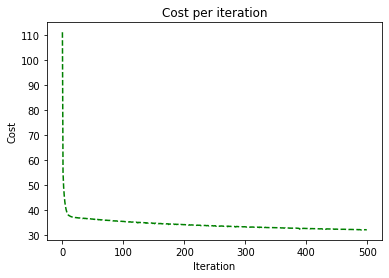

In [8]:
plt.plot(range(500), lasso.costs_, 'g--')
plt.title("Cost per iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [9]:
lasso.coeff_

array([-0.03280044,  0.10065729, -0.01752153,  0.00076307,  0.00054931,
        0.02647578,  0.03099303,  0.007017  , -0.00370771,  0.00174751,
        0.02335365,  0.05196695, -0.06617025])

In [10]:
y_pred = lasso.predict(X_test)

print("------- Lasso Regression -------")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

------- Lasso Regression -------
Mean Absolute Error:  6.512016846474716
RMSE:  9.18743078997022
R2 score:  0.14125310275836778
